In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

from picasso.utils.plots import plot_impact_model_params, plot_Gamma_r

import seaborn as sns
sns.set_style("darkgrid")
sns.set_theme("notebook")

# Polytropic gas model and non-thermal pressure fraction with varying parameters

The polytropic gas model can be written as (see Kéruzoré+24):

$$
\rho(\phi, \, r) = \rho_0 \theta^{\Gamma(r) / (\Gamma(r) - 1)}(\phi), \\[10pt]
P(\phi, \, r) = P_0 \theta^{1 / (\Gamma(r) - 1)}(\phi),
$$
where $\phi$ is the halo's gravitational potential, and
$$
\theta(\phi) = 1 - \theta_0 (\phi - \phi_0),
$$

The gas polytropic index, $\Gamma$, is allowed to vary with radius as:

$$
\Gamma(r) = 
\begin{cases}
\begin{aligned}
    & \; 1 + (\Gamma_0 - 1) \frac{1}{1 + e^{-x}} & c_\Gamma > 0; \\
    & \; \Gamma_0 & c_\Gamma = 0; \\
    & \; \Gamma_0 + (\Gamma_0 - 1) \left(1 - \frac{1}{1 + e^{x}}\right) & c_\Gamma < 0, \\
\end{aligned}
\end{cases}
$$

with $x \equiv r / (c_\gamma R_{500c})$.

This model has five parameters: $(\rho_0, P_0)$ are the central value of gas density and pressure, $\Gamma_0$ is the asymptotic value of the polytropic index as $r \rightarrow \infty$, $c_\gamma$ is the polytropic concentration ($c_\gamma = 0$ implies $\Gamma(r) = \Gamma_0$), and $\theta_0$ is a shape parameter.

We further write the fraction of non-thermal pressure as a power-law of radius, plus a constant plateau:

$$
f_{\rm nt}(r) = A_{\rm nt} + (B_{\rm nt} - A_{\rm nt}) \left(\frac{r}{2R_{500c}}\right)^{C_{\rm nt}}
$$

This adds three parameters to our gas model:  $A_{\rm nt}$ is the central value of non-thermal pressure fraction, $B_{\rm nt}$ is the non-thermal pressure fraction at $r=2R_{500c}$, and $C_{\rm nt}$ is the power law evolution with radius.

Let's vary each parameter one at a time and look at the impact on the gas properties, for an NFW halo:

/var/folders/3t/_vtqsjsx3hq7ktlc27qg58c00000gr/T/ipykernel_6895/1775941011.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


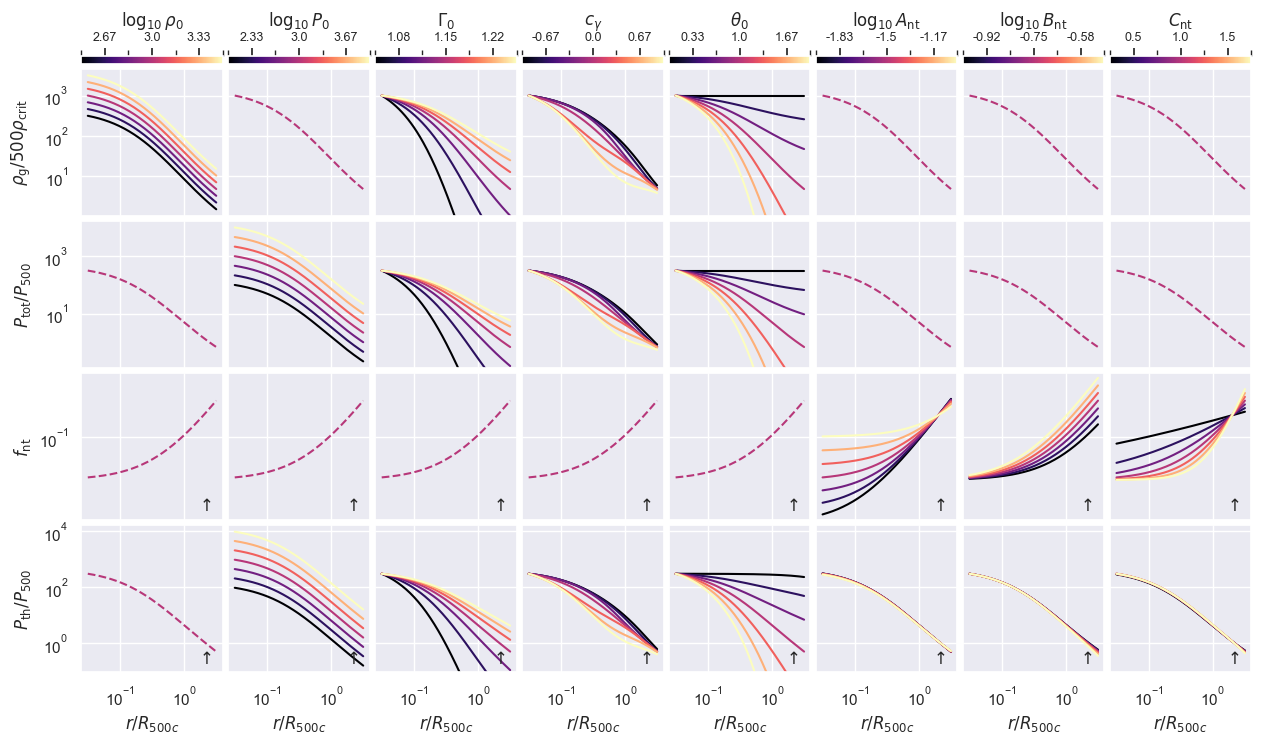

In [2]:
fig = plot_impact_model_params(n_curves=7, cmapname="magma")
fig.show()

## Radius-dependent polytropic index

/var/folders/3t/_vtqsjsx3hq7ktlc27qg58c00000gr/T/ipykernel_6895/71608787.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


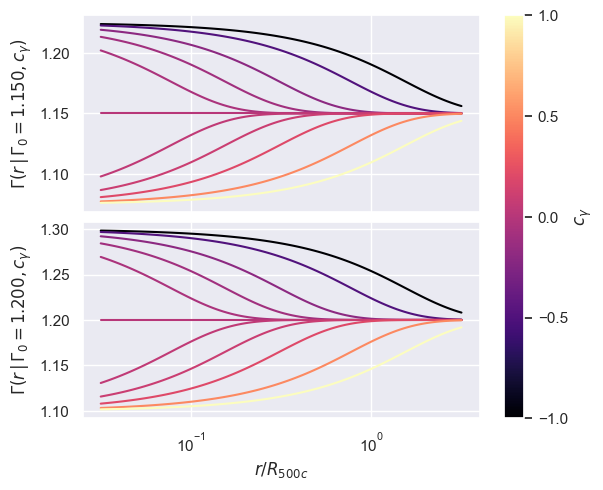

In [3]:
fig = plot_Gamma_r(
    Gamma_0 = jnp.array([1.15, 1.20]),
    c_gamma = jnp.array([-1, -0.5, -0.2, -0.1, -0.05, 0.0, 0.05, 0.1, 0.2, 0.5, 1]),
    cmapname="magma"
)
fig.show()